# **Завдання 1**

Для рівняння Нернста $$ΔE = \frac{RT}{nF}lg(\frac {K_{out}}{K_{in}})$$ вивести на графік три криві внутрішньоклітинної концентрації катіонів калію від температури, якщо трансмембранний потенціал є відомим. Перетворення рівняння виконати за допомогою функції sympy.solve().

Зовнішня концентрація калію 5 мМ, $ΔE = [-80,-70,-60] $ mV, інші значення є табличними. Графік, вісі підписати.

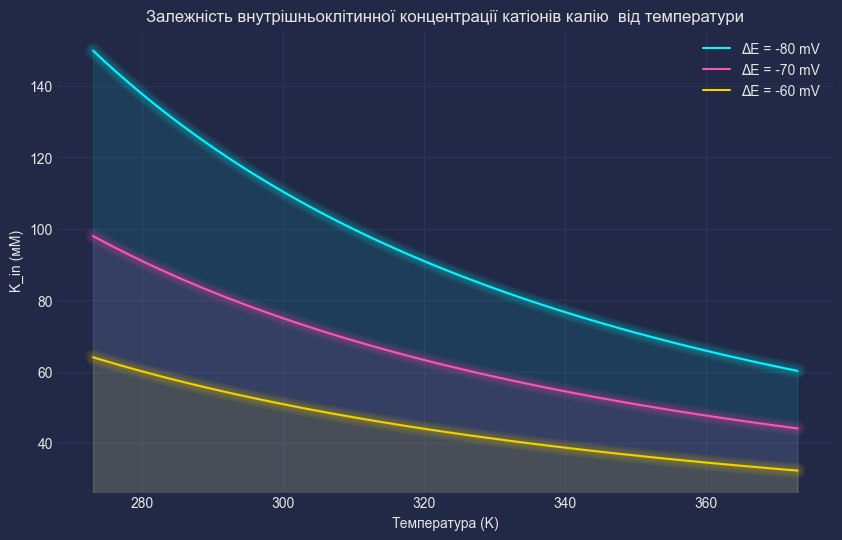

In [19]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk
import logging

# Налаштовуємо логування
logging.basicConfig(level=logging.INFO)

plt.style.use("cyberpunk")

# Дані
R = 8.314  # Газова константа, J/(mol*K)
F = 96485  # Фарадеївська константа, C/mol
n = 1  # Молекуларність електрону
K_out = 5  # мМ
delta_E_values = [-80e-3, -70e-3, -60e-3]  # потенціали у вольтах

# Символи для sympy
K_in, T, delta_E = sp.symbols('K_in T delta_E')

# Рівняння Нернста
equation = sp.Eq(delta_E, (R*T/(n*F))*sp.ln(K_out/K_in))

# Розв'язок для K_in
K_in_expr = sp.solve(equation, K_in)[0]

# Функція для розрахунку K_in відносно температури для різних потенціалів
def get_kin_values(T_values, delta_E_val):
    return [K_in_expr.subs({T: T_val, delta_E: delta_E_val}) for T_val in T_values]

# Значення температур (наприклад, від 273 до 373 К)
T_values = np.linspace(273, 373, 100)

# Побудова графіка
plt.figure(figsize=(10, 6))
for delta_E_val in delta_E_values:
    plt.plot(T_values, get_kin_values(T_values, delta_E_val), label=f'ΔE = {delta_E_val*1000:.0f} mV')

plt.title('Залежність внутрішньоклітинної концентрації катіонів калію  від температури')
plt.xlabel('Температура (K)')
plt.ylabel('K_in (мМ)')
plt.legend()
plt.grid(True)
mplcyberpunk.add_glow_effects()
plt.show()


## **Завдання 2**

Напишіть код, який дає аналітичне рішення рівняння Гомпертца $\cfrac{dN}{dt}=ϵ(1-\frac {ln(N)}{ln(K)})N$ з точністю до константи.

In [20]:
# Визначаємо змінні та функції
logging.info("Defining variables and functions...")
t = sp.Symbol('t', real=True, positive=True)
N = sp.Function('N')(t)
epsilon = sp.Symbol('epsilon', real=True, positive=True)
K = sp.Symbol('K', real=True, positive=True)

# Визначаємо рівняння Гомпертца
logging.info("Defining the Gompertz equation...")
eq = sp.Eq(N.diff(t), epsilon * (1 - sp.ln(N)/sp.ln(K)) * N)

# Розв'язуємо рівняння
logging.info("Solving the equation...")
solution = sp.dsolve(eq)
logging.info(f"Solution found: {solution}")

INFO:root:Defining variables and functions...
INFO:root:Defining the Gompertz equation...
INFO:root:Solving the equation...
INFO:root:Solution found: Eq(N(t), K*exp(C1*exp(-epsilon*t/log(K))))


## **Завдання 3**

Складіть систему диференційних рівнянь та розрахуйте аналітичний розв'язок, побудуйте часові графіки та фазовий графік для двох змінних. Отримати рівняння у викладача.
Розрахувати аналітично систему рівнянь, побудуйте часові графіки,
фазовий графік (f(t), g(t)) та тривимірний графік. Початкові значення,
параметри відображення підібрати самостійно для кращого виду.

Solution: [Eq(f(t), -(0.025*C1 + 0.99968745115661*C2)*cos(0.99968745115661*t)/exp(-0.075*t)**1.0 - (0.99968745115661*C1 - 0.025*C2)*sin(0.99968745115661*t)/exp(-0.075*t)**1.0 - 0.22197558268591*exp(-0.075*t)*sin(0.99968745115661*t)**2*sin(t)/exp(-0.075*t)**1.0 - 6.65926748057714*exp(-0.075*t)*sin(0.99968745115661*t)**2*cos(t)/exp(-0.075*t)**1.0 + 4.16333634234434e-16*exp(-0.075*t)*sin(0.99968745115661*t)*cos(0.99968745115661*t)*cos(t)/exp(-0.075*t)**1.0 - 0.221975582685911*exp(-0.075*t)*sin(t)*cos(0.99968745115661*t)**2/exp(-0.075*t)**1.0 - 6.65926748057714*exp(-0.075*t)*cos(0.99968745115661*t)**2*cos(t)/exp(-0.075*t)**1.0), Eq(g(t), 1.0*C1*cos(0.99968745115661*t)/exp(-0.075*t)**1.0 - 1.0*C2*sin(0.99968745115661*t)/exp(-0.075*t)**1.0 - 6.67036625971143*exp(-0.075*t)*sin(0.99968745115661*t)**2*sin(t)/exp(-0.075*t)**1.0 - 0.110987791342946*exp(-0.075*t)*sin(0.99968745115661*t)**2*cos(t)/exp(-0.075*t)**1.0 - 4.44089209850063e-16*exp(-0.075*t)*sin(0.99968745115661*t)*sin(t)*cos(0.999687451

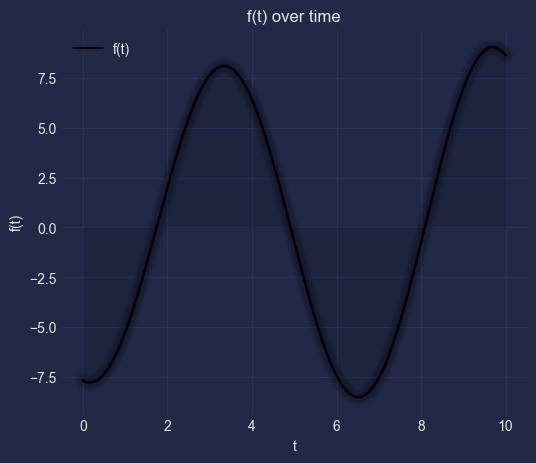

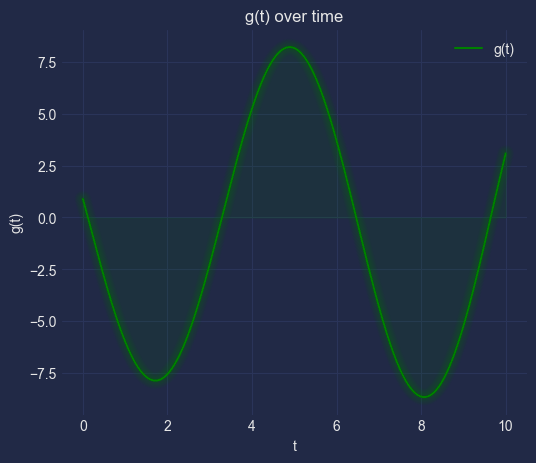

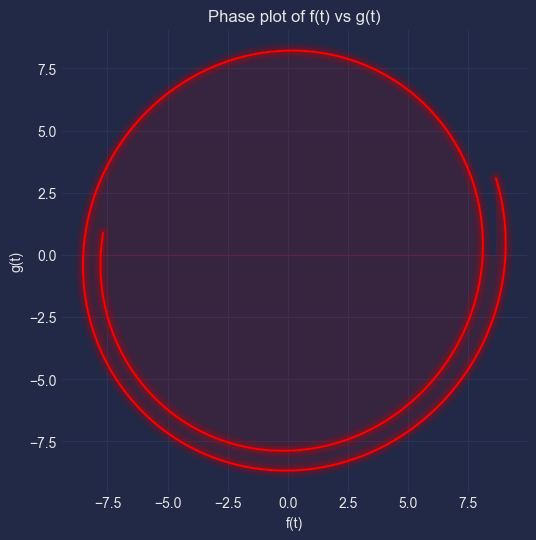

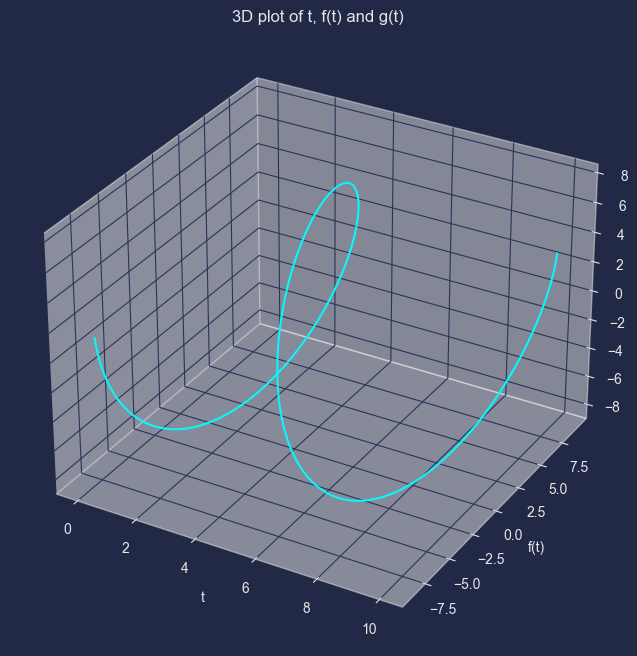

In [21]:
# Аналітичний розв'язок
t = sp.Symbol('t')
f = sp.Function('f')(t)
g = sp.Function('g')(t)

eq1 = sp.Eq(f.diff(t), 0.05*f - g)
eq2 = sp.Eq(g.diff(t), f + 0.1*g + sp.sin(t))

solution = sp.dsolve([eq1, eq2])

print(f"Solution: {solution}")

# Перетворимо аналітичний розв'язок на функції для використання з numpy
f_solution = solution[0].rhs
g_solution = solution[1].rhs

f_func = sp.lambdify(t, f_solution.subs({'C1': 1, 'C2': 1}), 'numpy')
g_func = sp.lambdify(t, g_solution.subs({'C1': 1, 'C2': 1}), 'numpy')

t_values = np.linspace(0, 10, 400)
f_values = f_func(t_values)
g_values = g_func(t_values)

# Графік для f(t)
plt.figure(figsize=(6, 5))
plt.plot(t_values, f_values, label="f(t)", color="BLACK")
plt.title("f(t) over time")
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.grid(True)
mplcyberpunk.add_glow_effects()
plt.show()

# Графік для g(t)
plt.figure(figsize=(6, 5))
plt.plot(t_values, g_values, label="g(t)", color="GREEN")
plt.title("g(t) over time")
plt.xlabel('t')
plt.ylabel('g(t)')
plt.legend()
plt.grid(True)
mplcyberpunk.add_glow_effects()
plt.show()

# Фазовий графік
plt.figure(figsize=(6, 6))
plt.plot(f_values, g_values, label="Phase plot", color="RED")
plt.title("Phase plot of f(t) vs g(t)")
plt.xlabel('f(t)')
plt.ylabel('g(t)')
plt.grid(True)
mplcyberpunk.add_glow_effects()
plt.show()

# Тривимірний графік
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(t_values, f_values, g_values)
ax.set_title("3D plot of t, f(t) and g(t)")
ax.set_xlabel('t')
ax.set_ylabel('f(t)')
ax.set_zlabel('g(t)')
plt.show()